In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets

# Actividad práctica 

### Instrucciones
- Escriba las rutinas de Python necesarias para resolver los problemas de cada punto
- Siga las instrucciones y conteste donde se pida
- Entregue el notebook con sus respuestas al correo: phuijse@inf.uach.cl
- El trabajo es individual

### Introducción
En esta actividad usaremos la base de datos [*Auto Milles per Gallon Data Set*](https://archive.ics.uci.edu/ml/datasets/auto+mpg) del repositorio UCI

Puede descargarla usando el siguiente bloque

In [137]:
%%bash
wget -O auto.csv -c https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original 
wget -O README -c https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.names 

--2019-05-09 23:09:16--  https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

--2019-05-09 23:09:17--  https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.names
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



### Información preliminar

1. Use las herramientas de UNIX para leer el archivo README en el notebook
1. Responda ¿Cuántos y cuáles son los atributos (características)? ¿De qué tipo es cada uno?
1. Responda ¿Cuantas instancias/ejemplos existen?


In [138]:
%%bash
cat README

1. Title: Auto-Mpg Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University. The dataset was 
                used in the 1983 American Statistical Association Exposition.
   (c) Date: July 7, 1993

3. Past Usage:
    -  See 2b (above)
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. Relevant Information:

   This dataset is a slightly modified version of the dataset provided in
   the StatLib library.  In line with the use by Ross Quinlan (1993) in
   predicting the attribute "mpg", 8 of the original instances were removed 
   because they had unknown values for the "mpg" attribute.  The original 
   dataset is available in the file "auto-mpg.data-original".

   "The data concerns city-cycle fuel consumptio

Son 9 atributos diferentes:
1. mpg:           continua
2. cylinders:     discreto
3. displacement:  continuo
4. horsepower:    continuo
5. weight:        continuo
6. acceleration:  continuo
7. model year:    discreto
8. origin:        discreto
9. car name:      string (unico para cada instancia)
Y un total de 398 instancias

### Lectura de datos

1. Cree un `DataFrame` a partir de `auto.csv` 
    1. Use una columna por atributo* 
    1. Use los nombres de columna descritos en `README` 
1. Imprima las primeras 5 filas del dataframe

**HINT:** Verifique el uso  del argumento `delim_whitespace`*

In [139]:
import pandas as pd
df = pd.read_csv("auto.csv", delim_whitespace=True, header=None)
names = df.columns.tolist()
names[names[0]] = 'mpg'
names[names[1]] = 'cylinders'
names[names[2]] = 'displacement'
names[names[3]] = 'horsepower'
names[names[4]] = 'weight'
names[names[5]] = 'acceleration'
names[names[6]] = 'year'
names[names[7]] = 'origin'
names[names[8]] = 'car name'
df.columns = names
df[:20]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,car name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino
5,15.0,8.0,429.0,198.0,4341.0,10.0,70.0,1.0,ford galaxie 500
6,14.0,8.0,454.0,220.0,4354.0,9.0,70.0,1.0,chevrolet impala
7,14.0,8.0,440.0,215.0,4312.0,8.5,70.0,1.0,plymouth fury iii
8,14.0,8.0,455.0,225.0,4425.0,10.0,70.0,1.0,pontiac catalina
9,15.0,8.0,390.0,190.0,3850.0,8.5,70.0,1.0,amc ambassador dpl


In [2]:
df.dtypes

NameError: name 'df' is not defined

### Manipulación de columnas 

1. Convierta las columnas *cylinders*, *year* y *origin* a valores enteros
1. Reemplace los valores $[1, 2, 3]$ de *origin* por *USA*, *Europe*, *Japan*, respectivamente
1. Convierta los valores de la columna *mpg* (galones por milla) a kmpl (kilómetros por litro)
1. Convierta los valores de la columna peso de libras (*pounds*) a kilogramos
1. Modifique el nombre de la columna *mpg* a kmpl


In [141]:
lista=list(df)
print(lista)

['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 'car name']


In [142]:
def cambiarInfo(fact):
    if fact == 1:
        return 'USA'
    elif fact == 2:
        return 'Europe'
    else:
        return 'japan'

In [143]:
df['cylinders'] = df['cylinders'].astype('int64')
df['year'] = df['year'].astype('int64')
df['origin'] = df['origin'].astype('int64')

df['mpg'] = df['mpg']/2.352
df['weight'] = df['weight']/2.205
df['origin'] = df['origin'].apply(cambiarInfo)

In [144]:
df.rename(columns={'mpg':'kmpl'},inplace=True)

### Datos perdidos

1. Encuentre los nombres de los autos que tengan valores perdidos (*missing data*)
1. Encuentre los nombres de los atributos que tengan valores perdidos
1. Elimines las filas con atributos perdidos ¿Cuántas filas quedan en el dataframe?

In [145]:
for i in range (0,len(df)):
    if (df.isnull()['kmpl'][i]==True):
        print(df['car name'][i])

citroen ds-21 pallas
chevrolet chevelle concours (sw)
ford torino (sw)
plymouth satellite (sw)
amc rebel sst (sw)
ford mustang boss 302
volkswagen super beetle 117
saab 900s


In [146]:
df.isnull().sum()

kmpl            8
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
year            0
origin          0
car name        0
dtype: int64

In [147]:
df.dropna(inplace=True)
df=df.reset_index()

In [148]:
df[:15]

,index,kmpl,cylinders,displacement,horsepower,weight,acceleration,year,origin,car name
0,0,7.653061,8,307.0,130.0,1589.115646,12.0,70,USA,chevrolet chevelle malibu
1,1,6.377551,8,350.0,165.0,1674.829932,11.5,70,USA,buick skylark 320
2,2,7.653061,8,318.0,150.0,1558.276644,11.0,70,USA,plymouth satellite
3,3,6.802721,8,304.0,150.0,1556.916100,12.0,70,USA,amc rebel sst
4,4,7.227891,8,302.0,140.0,1564.172336,10.5,70,USA,ford torino
5,5,6.377551,8,429.0,198.0,1968.707483,10.0,70,USA,ford galaxie 500
6,6,5.952381,8,454.0,220.0,1974.603175,9.0,70,USA,chevrolet impala
7,7,5.952381,8,440.0,215.0,1955.555556,8.5,70,USA,plymouth fury iii
8,8,5.952381,8,455.0,225.0,2006.802721,10.0,70,USA,pontiac catalina
9,9,6.377551,8,390.0,190.0,1746.031746,8.5,70,USA,amc ambassador dpl


### Multi-índice

1. Cree un dataframe con dos columnas a partir del atributo "*car name*"
    1. La primera columna debe tener la primera palabra del string en *car name**
    1. La segunda columna debe tener el resto del string en *car name*
1. Elimine la columna *car name* del dataframe y agregue estas nuevas columnas llamándolas *brand* y *model*, respectivamente
1. ¿Cuántas marcas (*brand*) únicas existan? ¿Existen columnas repetidas o mal escritas? Mencione cuales y corrijalas**
1. Cree un multi-índice que utilice como primera llave a *brand* y como segunda a *model*
1. Muestre los autos con marca *Mazda*
1. Usando groupby cuente la cantidad de modelos por marca

**HINT:** Verifique el uso de `.str.split()`* y `str.replace()`**

In [149]:
df2 = pd.DataFrame()
count=0
for row in df['car name']:
    df2 = df2.append([row.split(' ',1)], ignore_index=True)
df2.columns=['brand','model']

/home/fabian/.local/lib/python3.7/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [150]:
df.drop(['car name'], axis=1, inplace=True)

In [151]:
df = pd.concat([df, df2], axis=1)

In [152]:
df.groupby(['brand']).size()

brand
amc              27
audi              7
bmw               2
buick            17
cadillac          2
capri             1
chevroelt         1
chevrolet        43
chevy             3
chrysler          6
datsun           23
dodge            28
fiat              8
ford             48
hi                1
honda            13
maxda             2
mazda            10
mercedes          1
mercedes-benz     2
mercury          11
nissan            1
oldsmobile       10
opel              4
peugeot           8
plymouth         31
pontiac          16
renault           3
saab              4
subaru            4
toyota           25
toyouta           1
triumph           1
vokswagen         1
volkswagen       15
volvo             6
vw                6
dtype: int64

Están mal: chevroelt, maxda, mercedes, toyouta, vokswagen, vw

In [153]:
for i in range(0,len(df)):
    if(df['brand'][i]=='chevroelt'):
        df['brand'][i]='chevrolet'
    if(df['brand'][i]=='maxda'):
        df['brand'][i]='mazda'
    if(df['brand'][i]=='mercedes'):
        df['brand'][i]='mercedes-benz'
    if(df['brand'][i]=='toyouta'):
        df['brand'][i]='toyota'
    if(df['brand'][i]=='vokswagen'):
        df['brand'][i]='volkswagen'
    if(df['brand'][i]=='vw'):
        df['brand'][i]='volkswagen'

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingW

In [154]:
df=df.set_index(['brand','model'])

In [155]:
display(df.loc['mazda'])

,index,kmpl,cylinders,displacement,horsepower,weight,acceleration,year,origin
model,,,,,,,,,
rx2 coupe,78,8.078231,3,70.0,97.0,1056.689342,13.5,72,japan
rx3,118,7.653061,3,70.0,90.0,963.265306,13.5,73,japan
rx-4,250,9.141156,3,80.0,110.0,1233.560091,13.5,77,japan
glc deluxe,253,13.945578,4,78.0,52.0,900.226757,19.4,78,japan
glc deluxe,301,14.498299,4,86.0,65.0,895.691610,15.2,79,japan
626,326,13.307823,4,120.0,75.0,1152.834467,17.5,80,japan
glc,329,19.812925,4,86.0,65.0,956.916100,17.9,80,japan
rx-7 gs,341,10.076531,3,70.0,100.0,1097.505669,12.5,80,japan
glc 4,356,14.498299,4,91.0,68.0,900.226757,16.0,81,japan


In [156]:
df.groupby(['brand','model']).size().groupby('brand').size()

brand
amc              15
audi              6
bmw               2
buick            14
cadillac          2
capri             1
chevrolet        25
chevy             3
chrysler          6
datsun           20
dodge            25
fiat              7
ford             34
hi                1
honda             9
mazda            10
mercedes-benz     3
mercury          11
nissan            1
oldsmobile        9
opel              2
peugeot           5
plymouth         25
pontiac          13
renault           3
saab              3
subaru            1
toyota           17
triumph           1
volkswagen       15
volvo             6
dtype: int64

### Buscando autos

1. Por cada marca encuentre el auto más antiguo y el más nuevo
1. Por cada marca encuentre el auto más pesado y el más liviano
1. Por cada marca encuentre los autos con mayor y menor caballos de fuerza, respectivamente
1. Por cada marca encuentre los autos con menor y mayor desempeño en términos de kmpl, respectivamente

In [157]:
df_min_value = df[df['year'] == df.groupby('brand')['year'].transform('min')]
df_min_value.loc[:,['year']]

year
brand         model                  
chevrolet     chevelle malibu      70
buick         skylark 320          70
plymouth      satellite            70
amc           rebel sst            70
ford          torino               70
              galaxie 500          70
chevrolet     impala               70
plymouth      fury iii             70
pontiac       catalina             70
amc           ambassador dpl       70
dodge         challenger se        70
plymouth      'cuda 340            70
chevrolet     monte carlo          70
buick         estate wagon (sw)    70
toyota        corona mark ii       70
plymouth      duster               70
amc           hornet               70
ford          maverick             70
datsun        pl510                70
volkswagen    1131 deluxe sedan    70
peugeot       504                  70
audi          100 ls               70
saab          99e                  70
bmw           2002                 70
amc           gremlin              70
ford          f250                 70
chevy         c20                  70
dodge         d200                 70
hi            1200d                70
mercury       capri 2000           71
opel          1900                 71
fiat          124b                 71
oldsmobile    delta 88 royale      72
chrysler      newport royal        72
mazda         rx2 coupe            72
volvo         145e (sw)            72
renault       12 (sw)              72
honda         civic                74
subaru        NaN                  74
capri         ii                   76
mercedes-benz 280s                 76
cadillac      seville              76
triumph       tr7 coupe            80
nissan        stanza xe            82

In [158]:
df_min_value = df[df['year'] == df.groupby('brand')['year'].transform('max')]
df_min_value.loc[:,['year']]

,,year
brand,model,
hi,1200d,70
opel,1900,76
capri,ii,76
renault,5 gtl,77
bmw,320i,77
saab,99gle,78
cadillac,eldorado,79
fiat,strada custom,79
amc,concord,80


In [159]:
df_min_value = df[df['weight'] == df.groupby('brand')['weight'].transform('min')]
df_min_value.loc[:,['weight']]

,,weight
brand,model,
saab,99e,1077.097506
bmw,2002,1013.151927
hi,1200d,2146.031746
amc,gremlin,1194.557823
opel,1900,962.811791
peugeot,304,940.589569
datsun,1200,731.519274
fiat,128,846.712018
volvo,144ea,1300.680272


In [160]:
df_min_value = df[df['weight'] == df.groupby('brand')['weight'].transform('max')]
df_min_value.loc[:,['weight']]

,,weight
brand,model,
chevy,c20,1984.580499
hi,1200d,2146.031746
dodge,monaco (sw),2247.165533
pontiac,safari (sw),2331.065760
volkswagen,411 (sw),1138.775510
mercury,marquis brougham,2245.804989
chrysler,new yorker brougham,2147.392290
buick,electra 225 custom,2245.351474
chevrolet,impala,2266.213152


In [161]:
df_min_value = df[df['horsepower'] == df.groupby('brand')['horsepower'].transform('min')]
df_min_value.loc[:,['horsepower']]

,,horsepower
brand,model,
volkswagen,1131 deluxe sedan,46.0
saab,99e,95.0
hi,1200d,193.0
peugeot,304,70.0
volkswagen,super beetle,46.0
fiat,128,49.0
opel,manta,75.0
toyota,corona,52.0
datsun,710,61.0


In [162]:
df_min_value = df[df['horsepower'] == df.groupby('brand')['horsepower'].transform('max')]
df_min_value.loc[:,['horsepower']]

,,horsepower
brand,model,
chevrolet,impala,220.0
plymouth,fury iii,215.0
amc,ambassador dpl,190.0
buick,estate wagon (sw),225.0
bmw,2002,113.0
ford,f250,215.0
chevy,c20,200.0
dodge,d200,210.0
hi,1200d,193.0


In [163]:
df_min_value = df[df['kmpl'] == df.groupby('brand')['kmpl'].transform('min')]
df_min_value.loc[:,['kmpl']]

,,kmpl
brand,model,
ford,f250,4.251701
chevy,c20,4.251701
dodge,d200,4.676871
hi,1200d,3.826531
pontiac,safari (sw),5.527211
mercury,marquis,4.676871
chrysler,newport royal,5.527211
volkswagen,411 (sw),9.353741
renault,12 (sw),11.054422


In [164]:
df_min_value = df[df['kmpl'] == df.groupby('brand')['kmpl'].transform('max')]
df_min_value.loc[:,['kmpl']]

,,kmpl
brand,model,
saab,99e,10.629252
bmw,2002,11.054422
hi,1200d,3.826531
opel,1900,11.904762
peugeot,304,12.755102
saab,99le,10.629252
capri,ii,10.629252
buick,opel isuzu deluxe,12.755102
renault,5 gtl,15.306122


### Análisis exploratorio

1. Encuentre el promedio y la desviación estándar de cada atributo numérico en toda la tabla y por marca
1. Construya gráficos de barras del rendimiento (kmpl) promedio en función del año, peso, origen,  número de cilindros y marca (use *barras de error* con la desviación estándar del rendimiento)
1. Viendo estos gráficos, ¿Qué puede concluir respecto a la relación del rendimiento con estos factores?

In [165]:
#promedios
print(df['kmpl'].mean())
print(df['displacement'].mean())
print(df['horsepower'].mean())
print(df['weight'].mean())
print(df['acceleration'].mean())

print()

#desviacion estandar
print(df['kmpl'].std())
print(df['displacement'].std())
print(df['horsepower'].std())
print(df['weight'].std())
print(df['acceleration'].std())

9.968502707205332
194.41198979591837
104.46938775510205
1350.3783145911423
15.541326530612244

3.318455564018622
104.64400390890466
38.49115993282849
385.2165805183443
2.758864119188082


In [166]:
dfpromstd=df.groupby('brand').agg(['std','mean'])
dfpromstd.drop(['index'], axis=1)

kmpl            cylinders           displacement  \
                    std       mean       std      mean          std   
brand                                                                 
amc            1.371326   7.682981  1.154701  6.444444    56.839656   
audi           2.820091  11.358115  0.487950  4.285714    12.253279   
bmw            1.352883  10.097789  0.000000  4.000000     0.000000   
buick          2.449402   8.155762  1.504894  6.470588   103.366140   
cadillac       1.954164   8.397109  0.000000  8.000000     0.000000   
capri               NaN  10.629252       NaN  4.000000          NaN   
chevrolet      2.613770   8.660908  1.746637  6.136364   102.660785   
chevy          4.829004   7.653061  2.309401  6.666667   122.850858   
chrysler       2.060504   7.341270  1.673320  7.000000   113.226175   
datsun         2.432684  13.228335  0.688700  4.260870    24.907497   
dodge          3.220299   9.379555  1.885618  6.000000   102.476522   
fiat           1.744373  12.292730  0.000000  4.000000    15.132156   
ford           2.523972   8.280187  1.742257  6.166667    97.255638   
hi                  NaN   3.826531       NaN  8.000000          NaN   
honda          2.025668  14.354396  0.000000  4.000000    10.417564   
mazda          3.506439  12.779904  0.492366  3.666667    17.104625   
mercedes-benz  2.918022  10.189909  1.000000  5.000000    18.610033   
mercury        2.900571   8.128479  1.572491  6.545455   115.108644   
nissan              NaN  15.306122       NaN  4.000000          NaN   
oldsmobile     3.611472   8.971088  1.398412  7.200000    73.860529   
opel           0.726116  10.948129  0.000000  4.000000     9.500000   
peugeot        2.027032  10.071216  0.707107  4.250000    24.978562   
plymouth       3.313081   9.227562  1.632993  6.000000    94.285725   
pontiac        2.672462   8.508716  1.770122  6.250000   121.453352   
renault        2.341654  12.613379  0.000000  4.000000    11.532563   
saab           0.682041  10.161565  0.000000  4.000000     8.500000   
subaru         1.444484  12.978316  0.000000  4.000000     5.500000   
toyota         2.399796  11.975078  0.651625  4.230769    26.840182   
triumph             NaN  14.880952       NaN  4.000000          NaN   
volkswagen     3.018912  13.537801  0.000000  4.000000     8.254738   
volvo          2.125921   8.978175  1.032796  4.666667    17.224982   

                          horsepower                  weight               \
                     mean        std        mean         std         mean   
brand                                                                       
amc            253.851852  29.431557  114.703704  206.536645  1491.945914   
audi           111.857143  11.842217   86.714286  132.854904  1159.248461   
bmw            121.000000   2.121320  111.500000  117.370105  1096.145125   
buick          272.941176  45.098585  136.411765  354.378313  1611.497933   
cadillac       350.000000  38.890873  152.500000  153.928007  1877.551020   
capri          140.000000        NaN   92.000000         NaN  1166.439909   
chevrolet      238.136364  35.435579  112.750000  363.892376  1492.125335   
chevy          258.666667  59.045180  142.333333  398.284845  1685.714286   
chrysler       330.166667  54.650404  153.666667  355.337987  1774.149660   
datsun         103.260870  19.253458   83.826087  154.693252  1016.878636   
dodge          223.125000  37.724198  117.178571  402.060867  1454.081633   
fiat            92.125000  12.546343   73.375000   82.676420   971.938776   
ford           239.354167  37.139323  112.229167  370.587669  1516.780045   
hi             304.000000        NaN  193.000000         NaN  2146.031746   
honda           97.230769  11.312575   67.846154  103.837964   917.634746   
mazda           87.750000  17.452967   77.666667  127.366016  1013.643235   
mercedes-benz  165.666667  28.160256   88.000000  129.258331  1602.418745   
mercury        258.000000  48.157696  119.818182  435.355553  15

In [167]:
prom_kmpl_year=df.groupby('year').mean()['kmpl']
std_kmpl_year=df.groupby('year').std()['kmpl']

prom_kmpl_weight=df.groupby('weight').mean()['kmpl']
std_kmpl_weight=df.groupby('weight').std()['kmpl']

prom_kmpl_origin=df.groupby('origin').mean()['kmpl']
std_kmpl_origin=df.groupby('origin').std()['kmpl']

prom_kmpl_cyl=df.groupby('cylinders').mean()['kmpl']
std_kmpl_cyl=df.groupby('cylinders').std()['kmpl']

prom_kmpl_brand=df.groupby('brand').mean()['kmpl']
std_kmpl_brand=df.groupby('brand').std()['kmpl']

In [168]:
prom_kmpl_year.index.values

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82])

<IPython.core.display.Javascript object>


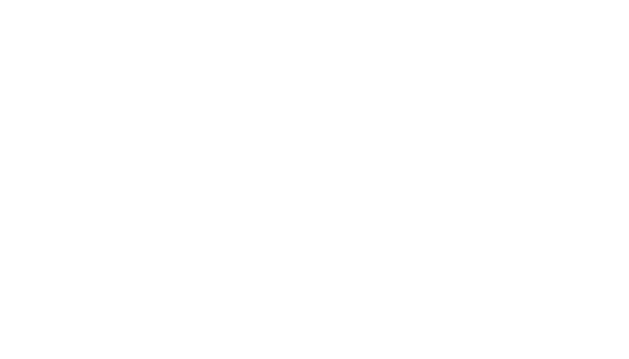

<ErrorbarContainer object of 3 artists>

In [169]:
fig, ax = plt.subplots(figsize=(7, 4), tight_layout=True, facecolor='w')
ax.grid()
x = prom_kmpl_year.index.values
ax.errorbar(prom_kmpl_year.index.values, y=prom_kmpl_year.values, yerr=std_kmpl_year.values, fmt='.', elinewidth=None, ecolor=None, capsize=None)

<IPython.core.display.Javascript object>


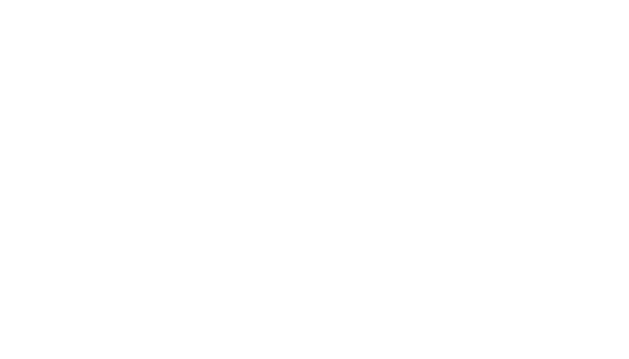

<ErrorbarContainer object of 3 artists>

In [170]:
fig, ax = plt.subplots(figsize=(7, 4), tight_layout=True, facecolor='w')
ax.grid()
x = prom_kmpl_year.index.values
ax.errorbar(prom_kmpl_weight.index.values, y=prom_kmpl_weight.values, yerr=std_kmpl_weight.values, fmt='.', elinewidth=None, ecolor=None, capsize=None)

<IPython.core.display.Javascript object>


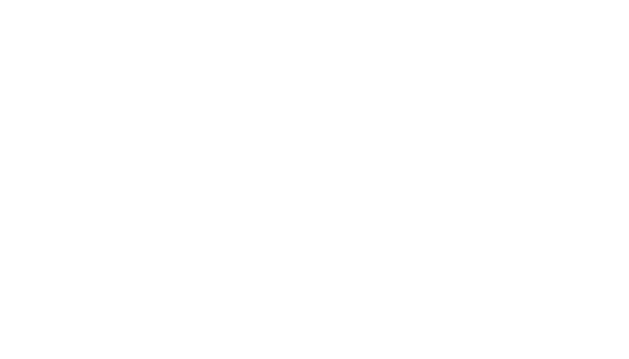

<ErrorbarContainer object of 3 artists>

In [171]:
fig, ax = plt.subplots(figsize=(7, 4), tight_layout=True, facecolor='w')
ax.grid()
x = prom_kmpl_year.index.values
ax.errorbar(prom_kmpl_origin.index.values, y=prom_kmpl_origin.values, yerr=std_kmpl_origin.values, fmt='.', elinewidth=None, ecolor=None, capsize=None)

<IPython.core.display.Javascript object>


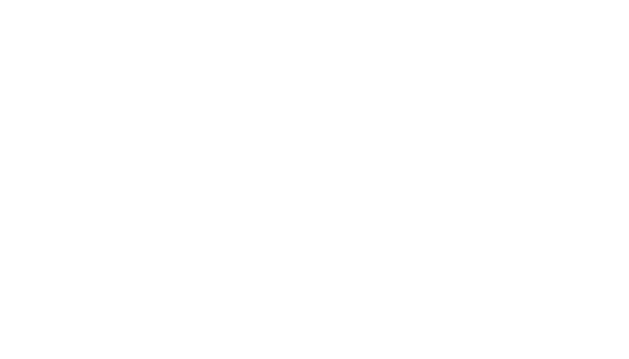

<ErrorbarContainer object of 3 artists>

In [172]:
fig, ax = plt.subplots(figsize=(7, 4), tight_layout=True, facecolor='w')
ax.grid()
x = prom_kmpl_year.index.values
ax.errorbar(prom_kmpl_cyl.index.values, y=prom_kmpl_cyl.values, yerr=std_kmpl_cyl.values, fmt='.', elinewidth=None, ecolor=None, capsize=None)

<IPython.core.display.Javascript object>


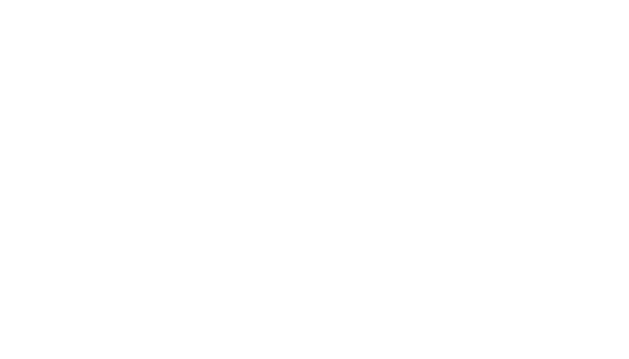

<ErrorbarContainer object of 3 artists>

In [173]:
fig, ax = plt.subplots(figsize=(7, 4), tight_layout=True, facecolor='w')
ax.grid()
x = prom_kmpl_year.index.values
plt.xticks(rotation=90)
ax.errorbar(prom_kmpl_brand.index.values, y=prom_kmpl_brand.values, yerr=std_kmpl_brand.values, fmt='.', elinewidth=None, ecolor=None, capsize=None)

de cada gráfico se puede concluir diferentes cosas, como que los autos de USA tienen peor rendimiento que los demáso que los autos con 5 cilindros tienen un rendimiento más variable

### Gráficos interactivos

1. Construya una interfaz gráfica usando `ipywidgets` que permita seleccionar dos atributos y los gráfique como un *scatter plot*
    1. El primer atributo será el eje de abscisas y el segundo atributo el eje de ordenadas
    1. Ese el atributo de origen como el color de los marcadores
1. Los gráficos deben ser legibles, los ejes deben estar etiquetados, use leyenda para los marcadores

In [174]:
df.dtypes

index             int64
kmpl            float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
year              int64
origin           object
dtype: object

<IPython.core.display.Javascript object>


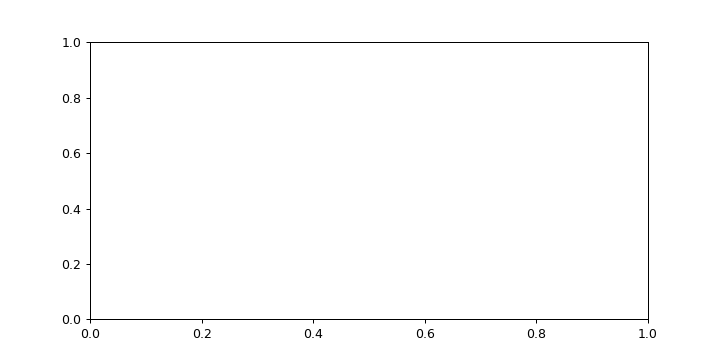

In [175]:
%matplotlib notebook

def on_change(change):
    opciones=['weight', 'horsepower', 'kmpl', 'year']
    select_y .options=opciones
    
sel_slider_x= widgets.Dropdown(description='Eje X',options=['weight', 'horsepower', 'kmpl', 'year'])
sel_slider_y = widgets.Dropdown(description='Eje Y',options=['weight', 'horsepower', 'kmpl', 'year'])

actualizar = widgets.Button(description='actualizar')

fig, ax1 = plt.subplots(figsize=(8, 4))

def Graficar(b):
    ax1.cla()
    for index in ['Europe', 'Japan', 'USA']:
        var=df.loc[df["origin"]==index]
        ax1.scatter(sel_slider_x.values, y=sel_slider_y.values, marker=None, s=None, c=None,label=index, alpha=1.) 
    ax1.legend()

actualizar.on_click(Graficar)

sel_slider=widgets.HBox([sel_slider_x,sel_slider_y, actualizar])
display(sel_slider)
select_x.observe(on_change, names='value')